## WeatherPy - Amanda Gaston
* Observation 1 | The closer one gets to the Equator, or 0° Latitude, the higher the temperature is. Because the weather data that is given is current info, temperatures are still higher as you get further from the Equator going South because the Southern Hemisphere is experiencing Summer right now. If you go North of the Equator, the temperatures drop - the Northern Hemisphere is experiencing Winter right now.
* Observation 2 | Humidity, Cloudiness & Wind Speed don't seem to correspond with the Latitude of a city, which may be because other factors play into the three: like the nearness to water, agriculture, wind patterns, etc. The charts show the Humidity, Cloudiness & Wind Speed data as evenly spread out.
* Observation 3 | Wind Speed is rarely above 25 mph, and if it is, it is more likely to be further away from the equator

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [4]:
print(cities)

['paka', 'nizhniy odes', 'romitan', 'hasaki', 'klaksvik', 'mount pleasant', 'illoqqortoormiut', 'tuatapere', 'krzeszowice', 'barrow', 'pevek', 'nikolskoye', 'ushuaia', 'rikitea', 'khatanga', 'ola', 'port lincoln', 'richards bay', 'sakakah', 'punta arenas', 'papara', 'hilo', 'butaritari', 'lavrentiya', 'mundi', 'brighton', 'longyearbyen', 'usinsk', 'bluff', 'sinnamary', 'marcona', 'otane', 'tabiauea', 'atuona', 'santarem', 'havelock', 'vaini', 'kieta', 'alugan', 'puerto ayora', 'half moon bay', 'busselton', 'port alfred', 'tateyama', 'saskylakh', 'faya', 'jamestown', 'kaitangata', 'chuy', 'tasiilaq', 'gorno-chuyskiy', 'mao', 'hobart', 'bethel', 'mys shmidta', 'mataura', 'fortuna', 'jalu', 'capreol', 'berlevag', 'asau', 'lebu', 'clyde river', 'kapaa', 'sorvag', 'pringsewu', 'yellowknife', 'najran', 'erenhot', 'khonuu', 'faanui', 'tiksi', 'iqaluit', 'sitka', 'bengkulu', 'zhigansk', 'belushya guba', 'upington', 'attawapiskat', 'namibe', 'cidreira', 'narsaq', 'new norfolk', 'dikson', 'east 

In [5]:
# Remove spaces in City Data
cities = [city.replace(" ", "+") for city in cities]
print(cities)

['paka', 'nizhniy+odes', 'romitan', 'hasaki', 'klaksvik', 'mount+pleasant', 'illoqqortoormiut', 'tuatapere', 'krzeszowice', 'barrow', 'pevek', 'nikolskoye', 'ushuaia', 'rikitea', 'khatanga', 'ola', 'port+lincoln', 'richards+bay', 'sakakah', 'punta+arenas', 'papara', 'hilo', 'butaritari', 'lavrentiya', 'mundi', 'brighton', 'longyearbyen', 'usinsk', 'bluff', 'sinnamary', 'marcona', 'otane', 'tabiauea', 'atuona', 'santarem', 'havelock', 'vaini', 'kieta', 'alugan', 'puerto+ayora', 'half+moon+bay', 'busselton', 'port+alfred', 'tateyama', 'saskylakh', 'faya', 'jamestown', 'kaitangata', 'chuy', 'tasiilaq', 'gorno-chuyskiy', 'mao', 'hobart', 'bethel', 'mys+shmidta', 'mataura', 'fortuna', 'jalu', 'capreol', 'berlevag', 'asau', 'lebu', 'clyde+river', 'kapaa', 'sorvag', 'pringsewu', 'yellowknife', 'najran', 'erenhot', 'khonuu', 'faanui', 'tiksi', 'iqaluit', 'sitka', 'bengkulu', 'zhigansk', 'belushya+guba', 'upington', 'attawapiskat', 'namibe', 'cidreira', 'narsaq', 'new+norfolk', 'dikson', 'east+

In [6]:
# URL components
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Starter Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Lists
code = []
country = []
cloud = []
date = []
humd = []
lat = []
long = []
temp = []
wind = []

# Loop through cities to grab data
for city in cities:
    response = requests.get(query_url + city).json()
    code.append(response['cod'])
    if response["cod"]!=200:
        cities.remove(city)
        continue
    country.append(response['sys']['country'])
    cloud.append(response['clouds']['all'])
    date.append(response['dt'])
    humd.append(response['main']['humidity'])
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    wind.append(response['wind']['speed'])
    print(f"Processing Record | {city} {query_url}{city}")
    time.sleep(1)

Processing Record | paka http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=paka
Processing Record | nizhniy+odes http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=nizhniy+odes
Processing Record | romitan http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=romitan
Processing Record | hasaki http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=hasaki
Processing Record | klaksvik http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=klaksvik
Processing Record | mount+pleasant http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=mount+pleasant
Processing Record | krzeszowice http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=krzeszowice
P

Processing Record | kenora http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kenora
Processing Record | albany http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=albany
Processing Record | severo-kurilsk http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=severo-kurilsk
Processing Record | ambilobe http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=ambilobe
Processing Record | bredasdorp http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=bredasdorp
Processing Record | muros http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=muros
Processing Record | seoul http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=seoul
Processing Record

Processing Record | batagay http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=batagay
Processing Record | saldanha http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=saldanha
Processing Record | gazli http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=gazli
Processing Record | ahome http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=ahome
Processing Record | nemuro http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=nemuro
Processing Record | kloulklubed http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kloulklubed
Processing Record | cherskiy http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cherskiy
Processing Record | dauph

Processing Record | tuktoyaktuk http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=tuktoyaktuk
Processing Record | quelimane http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=quelimane
Processing Record | henties+bay http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=henties+bay
Processing Record | antofagasta http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=antofagasta
Processing Record | kavaratti http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kavaratti
Processing Record | hohhot http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=hohhot
Processing Record | thompson http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=thom

Processing Record | awbari http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=awbari
Processing Record | chillicothe http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=chillicothe
Processing Record | puerto+del+rosario http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=puerto+del+rosario
Processing Record | tautira http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=tautira
Processing Record | basco http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=basco
Processing Record | miandrivazo http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=miandrivazo
Processing Record | solnechnyy http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=

Processing Record | reconquista http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=reconquista
Processing Record | dzhebariki-khaya http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=dzhebariki-khaya
Processing Record | evensk http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=evensk
Processing Record | cay http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cay
Processing Record | pitimbu http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=pitimbu
Processing Record | erzurum http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=erzurum
Processing Record | hambantota http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=hambantota
Proce

Processing Record | kandrian http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kandrian
Processing Record | albertville http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=albertville
Processing Record | la+ronge http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=la+ronge
Processing Record | yulara http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=yulara
Processing Record | cabedelo http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cabedelo
Processing Record | sainte-marie http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=sainte-marie
Processing Record | sur http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=sur
Processing Re

Processing Record | rupert http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=rupert
Processing Record | kamaishi http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kamaishi
Processing Record | broken+hill http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=broken+hill
Processing Record | oxapampa http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=oxapampa
Processing Record | peace+river http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=peace+river
Processing Record | hofn http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=hofn
Processing Record | barra+do+garcas http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=barra+do+garcas

Processing Record | mongoumba http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=mongoumba
Processing Record | san+rafael+del+sur http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=san+rafael+del+sur
Processing Record | marfino http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=marfino
Processing Record | cizre http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cizre
Processing Record | werda http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=werda
Processing Record | saint-georges http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=saint-georges
Processing Record | clement+town http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=

In [7]:
# Check Values in Arrays
len(cities), len(code), len(country), len(cloud), len(date), len(humd), len(lat), len(long), len(temp), len(wind)

(550, 550, 483, 483, 483, 483, 483, 483, 483, 483)

In [8]:
# Clean up Cities Code
print(cities)
print(code)

['paka', 'nizhniy+odes', 'romitan', 'hasaki', 'klaksvik', 'mount+pleasant', 'tuatapere', 'krzeszowice', 'barrow', 'pevek', 'nikolskoye', 'ushuaia', 'rikitea', 'khatanga', 'ola', 'port+lincoln', 'richards+bay', 'punta+arenas', 'papara', 'hilo', 'butaritari', 'lavrentiya', 'mundi', 'brighton', 'longyearbyen', 'usinsk', 'bluff', 'sinnamary', 'otane', 'atuona', 'havelock', 'vaini', 'kieta', 'alugan', 'puerto+ayora', 'half+moon+bay', 'busselton', 'port+alfred', 'tateyama', 'saskylakh', 'faya', 'jamestown', 'kaitangata', 'chuy', 'tasiilaq', 'mao', 'hobart', 'bethel', 'mataura', 'fortuna', 'jalu', 'capreol', 'berlevag', 'lebu', 'clyde+river', 'kapaa', 'pringsewu', 'yellowknife', 'najran', 'erenhot', 'faanui', 'tiksi', 'iqaluit', 'sitka', 'zhigansk', 'upington', 'namibe', 'cidreira', 'narsaq', 'new+norfolk', 'dikson', 'east+london', 'kenora', 'albany', 'severo-kurilsk', 'ambilobe', 'qaracala', 'bredasdorp', 'muros', 'seoul', 'cape+town', 'atambua', 'brawley', 'les+cayes', 'young', 'broome', 's

In [9]:
# Zip City/Code
citycode = [(a, b) for a, b in zip(cities, code) if b == 200]
print(citycode)

[('paka', 200), ('nizhniy+odes', 200), ('romitan', 200), ('hasaki', 200), ('klaksvik', 200), ('mount+pleasant', 200), ('krzeszowice', 200), ('barrow', 200), ('pevek', 200), ('nikolskoye', 200), ('ushuaia', 200), ('rikitea', 200), ('khatanga', 200), ('ola', 200), ('port+lincoln', 200), ('richards+bay', 200), ('papara', 200), ('hilo', 200), ('butaritari', 200), ('lavrentiya', 200), ('mundi', 200), ('brighton', 200), ('longyearbyen', 200), ('usinsk', 200), ('bluff', 200), ('sinnamary', 200), ('vaini', 200), ('kieta', 200), ('alugan', 200), ('puerto+ayora', 200), ('half+moon+bay', 200), ('busselton', 200), ('port+alfred', 200), ('tateyama', 200), ('saskylakh', 200), ('faya', 200), ('jamestown', 200), ('kaitangata', 200), ('chuy', 200), ('tasiilaq', 200), ('hobart', 200), ('bethel', 200), ('fortuna', 200), ('jalu', 200), ('capreol', 200), ('berlevag', 200), ('clyde+river', 200), ('kapaa', 200), ('yellowknife', 200), ('najran', 200), ('erenhot', 200), ('tiksi', 200), ('iqaluit', 200), ('sitk

In [10]:
# Check Values in Arrays
len(citycode), len(country), len(cloud), len(date), len(humd), len(lat), len(long), len(temp), len(wind)

(483, 483, 483, 483, 483, 483, 483, 483, 483)

In [11]:
# Unzip City/Code
cities, code = zip(*citycode)
print(cities)
print(code)

('paka', 'nizhniy+odes', 'romitan', 'hasaki', 'klaksvik', 'mount+pleasant', 'krzeszowice', 'barrow', 'pevek', 'nikolskoye', 'ushuaia', 'rikitea', 'khatanga', 'ola', 'port+lincoln', 'richards+bay', 'papara', 'hilo', 'butaritari', 'lavrentiya', 'mundi', 'brighton', 'longyearbyen', 'usinsk', 'bluff', 'sinnamary', 'vaini', 'kieta', 'alugan', 'puerto+ayora', 'half+moon+bay', 'busselton', 'port+alfred', 'tateyama', 'saskylakh', 'faya', 'jamestown', 'kaitangata', 'chuy', 'tasiilaq', 'hobart', 'bethel', 'fortuna', 'jalu', 'capreol', 'berlevag', 'clyde+river', 'kapaa', 'yellowknife', 'najran', 'erenhot', 'tiksi', 'iqaluit', 'sitka', 'cidreira', 'narsaq', 'new+norfolk', 'dikson', 'east+london', 'kenora', 'albany', 'severo-kurilsk', 'ambilobe', 'bredasdorp', 'muros', 'seoul', 'cape+town', 'atambua', 'brawley', 'young', 'broome', 'singapore', 'constitucion', 'riyadh', 'tual', 'flinders', 'avarua', 'charyshskoye', 'ancud', 'bereda', 'moose+factory', 'mantua', 'davila', 'geraldton', 'uthal', 'cabo+s

In [12]:
# Check Values in Arrays
len(cities), len(code), len(country), len(cloud), len(date), len(humd), len(lat), len(long), len(temp), len(wind)

(483, 483, 483, 483, 483, 483, 483, 483, 483, 483)

In [13]:
# Create a Data Frame
weather_dict = {
    "City": cities,
    "Country": country,
    "Cloudiness": cloud,
    "Date": date,
    "Humidity": humd,
    "Lat": lat,
    "Long": long,
    "Temperature": temp,
    "Wind speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Long,Temperature,Wind speed
0,paka,HR,0,1547485200,69,45.29,18.06,35.60,8.05
1,nizhniy+odes,RU,80,1547487836,76,63.64,54.86,19.04,7.20
2,romitan,UZ,75,1547485200,76,39.93,64.38,50.00,4.70
3,hasaki,JP,20,1547487000,86,35.73,140.83,30.60,5.82
4,klaksvik,FO,92,1547486400,100,62.23,-6.59,32.00,14.99


In [14]:
#Data Counts
weather_data.count()

City           483
Country        483
Cloudiness     483
Date           483
Humidity       483
Lat            483
Long           483
Temperature    483
Wind speed     483
dtype: int64

In [15]:
# Push new Data Frame to a CSV file
weather_data.to_csv("Output/weather_data.csv",
                   encoding="utf-8", index=False, header=True)


In [16]:
# Import CSV
cities_df = pd.read_csv("Output/weather_data.csv")
cities_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Long,Temperature,Wind speed
0,paka,HR,0,1547485200,69,45.29,18.06,35.60,8.05
1,nizhniy+odes,RU,80,1547487836,76,63.64,54.86,19.04,7.20
2,romitan,UZ,75,1547485200,76,39.93,64.38,50.00,4.70
3,hasaki,JP,20,1547487000,86,35.73,140.83,30.60,5.82
4,klaksvik,FO,92,1547486400,100,62.23,-6.59,32.00,14.99


In [17]:
# Check Values
cities_df.count()

City           483
Country        479
Cloudiness     483
Date           483
Humidity       483
Lat            483
Long           483
Temperature    483
Wind speed     483
dtype: int64

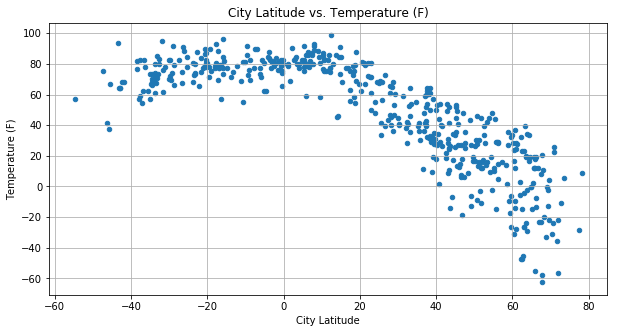

In [28]:
# Plot Latitude vs. Temperature
cities_df.plot(kind="scatter", x="Lat", y="Temperature", grid=True, figsize=(10,5),
              title="City Latitude vs. Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/LatTemp.png")
plt.show()

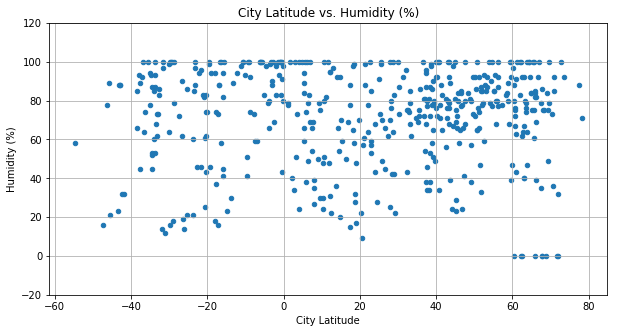

In [29]:
# Plot Latitude vs. Humidity
cities_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,5),
              title="City Latitude vs. Humidity (%)")
# Set the upper and lower limits of our y axis
plt.ylim(-20,120)
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatHumd.png")
plt.show()

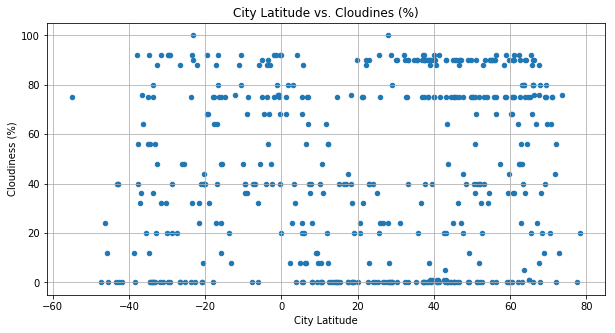

In [31]:
# Plot Latitude vs. Cloudiness
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,5),
              title="City Latitude vs. Cloudines (%)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatCloud.png")
plt.show()

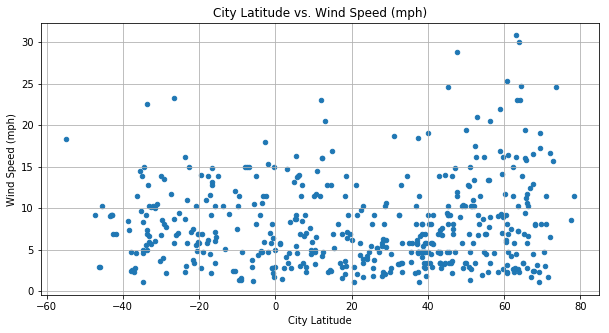

In [32]:
# Plot Latitude vs. Wind Speed
cities_df.plot(kind="scatter", x="Lat", y="Wind speed", grid=True, figsize=(10,5),
              title="City Latitude vs. Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatWind.png")
plt.show()